  # Introduction to scikit learn

### 0. An end to end Scikit Learn workflow

In [1]:
# get the data ready
import pandas as pd
import numpy as np
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [57]:
# Create x(features matrix)
x=heart_disease.drop("target",axis=1)

#Create Y (labels)
y= heart_disease["target"]


In [58]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

#we will keep the default hyperparameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [59]:
#fit the model to the training data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [60]:
clf.fit(X_train,y_train);

In [61]:
# make a prediction
y_label = clf.predict(X_test)

In [62]:
y_label

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [63]:
y_preds=clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [64]:
# 4. Evaluate the Model on training data and test data
clf.score(X_train,y_train)


1.0

In [65]:
clf.score(X_test,y_test)

0.8360655737704918

In [66]:
from sklearn.metrics import *
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [67]:
confusion_matrix(y_test,y_preds)

array([[22,  6],
       [ 4, 29]], dtype=int64)

In [68]:
accuracy_score(y_test,y_preds)

0.8360655737704918

In [69]:
# 5. Improve a model
##try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
    print("")

trying model with 10 estimators...
Model accuracy on test set: 78.69%

trying model with 20 estimators...
Model accuracy on test set: 77.05%

trying model with 30 estimators...
Model accuracy on test set: 83.61%

trying model with 40 estimators...
Model accuracy on test set: 80.33%

trying model with 50 estimators...
Model accuracy on test set: 81.97%

trying model with 60 estimators...
Model accuracy on test set: 83.61%

trying model with 70 estimators...
Model accuracy on test set: 83.61%

trying model with 80 estimators...
Model accuracy on test set: 83.61%

trying model with 90 estimators...
Model accuracy on test set: 81.97%



In [70]:
# save the model and load it 
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))


In [71]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
z=loaded_model.score(X_test,y_test)


In [72]:
print(f"{z * 100:.2f}")

81.97


In [73]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.5 (default, May 18 2021, 14:42:02) [MSC v.1916 64 bit (AMD64)]
executable: F:\DATA SCIENCE\FILE\miniconda_p1\env\python.exe
   machine: Windows-10-10.0.19042-SP0

Python dependencies:
          pip: 21.1.2
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.2
        numpy: 1.20.2
        scipy: 1.6.2
       Cython: None
       pandas: 1.2.4
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. getting our data ready to be used with machine larning

### Threemain things we have to do:  
    1.split the data into feature and labels(usually `X` and `y`)
    2.Filling(also called imputing) or disregarding missing values.
    3.Converting non-numerical values to nemurical values (also called feature encoding)

In [75]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
X=heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [77]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [78]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [79]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [80]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2


In [81]:
X.shape[0]*.8

242.4

In [82]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [83]:
#split into X/y
X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]



In [84]:
#split into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [85]:
X_train

,Make,Colour,Odometer (KM),Doors
303,Toyota,White,134862,4
910,Nissan,White,40598,4
405,BMW,Blue,142189,3
432,Toyota,White,149989,4
43,Toyota,Blue,141617,4
...,...,...,...,...
326,Toyota,Blue,232912,4
510,Toyota,Green,118706,4
656,Toyota,Blue,63501,4
499,Nissan,White,82429,4


In [86]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [87]:
#Turn the catagories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X=transformer.fit_transform(X)

In [88]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [89]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [90]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [91]:
# lets try refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)


In [92]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.3235867221569877

### 1.2 what if there were missing values?

1. Fill them with some value(also known as imputation).
2. remove the samples with missing data altogether.

In [93]:
#Import car sales missing data
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [94]:
car_sales_missing.isna().sum() #total null value of each column 

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Option 1: Fill missing data with pandas

In [95]:
#fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

#fill the Colour column
car_sales_missing["Colour"].fillna("missing",inplace=True)

#fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

#fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [96]:
#caheck dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [97]:
#Remove rows with missing price value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [98]:
len(car_sales_missing)

950

In [99]:
#create X and y
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]
# lets try and convert our data to numbers

In [100]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [101]:
#let's try and convert our data to numbers
#turn the catagories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder() 
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [109]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model=RandomForestRegressor()


model.fit(X_train,y_train); 
model.score(X_test,y_test)

0.9998421058539825

### Option 2: Fill missing values with Scikit-Learn

In [21]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")

In [22]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [16]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [17]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum() 

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [18]:
#split into X and y
X = car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [23]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [8]:
# fill missing value with Scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
    
#fill categorical value with 'missing ' and numerical value with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

#Create an imputer(something that feeling missing data)
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)    
])

#transform the data
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [9]:
car_selles_filled=pd.DataFrame(filled_X,columns=["Make","Colour","Odometer (KM)","Doors"])
car_selles_filled

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [10]:
car_selles_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [12]:
#let's try and convert our data to numbers
#turn the catagories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder() 
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(car_selles_filled)
transformed_X


<950x913 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [13]:

np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model=RandomForestRegressor()


model.fit(X_train,y_train); 
model.score(X_test,y_test)

-0.044955128011236356

In [125]:
len(car_selles_filled),len(car_sales)

(950, 1000)

# 2.Choosing the right estimator/algorithm for our problem
#### Scikit-learn uses  estimator as another term for mechine learning model or algorithm

* Classification - predicting weather a sample is one thing or another
* regression - predicting a number 

Step 1: Check the Scikit_Learn machine learning map...
        https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

In [25]:
#import Boston housing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [26]:
boston_df=pd.DataFrame(boston["data"], columns=boston['feature_names'])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
len(boston_df)

506

In [28]:
#let's try ridge Regression model
from sklearn.linear_model import Ridge

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
-
X=boston_df.drop('target',axis=1)
y=boston_df["target"]

#split into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate Ridge model
model=Ridge()
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.6662221670168519

* How do we improve this score?
* what if ridge wasn't working ?

Let's refer back to the map...  https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [29]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X=boston_df.drop('target',axis=1)
y=boston_df["target"]

#split into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate Ridge model
model=RandomForestRegressor()
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8654448653350507

### 2.2 Choosing and estimator for a classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [2]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [4]:
#import the LinearSVC estimator class
from sklearn.svm import LinearSVC

np.random.seed(42)
from sklearn.model_selection import train_test_split

X=heart_disease.drop('target',axis=1)
y=heart_disease["target"]
    
#split into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate LinearSVG
model=LinearSVC(max_iter=10000)
model.fit(X_train,y_train)

model.score(X_test,y_test)

F:\DATA SCIENCE\FILE\miniconda_p1\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [5]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
#import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
from sklearn.model_selection import train_test_split

X=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

#split into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8524590163934426

Tipbit:
    1. If you have structured data, used ensamble method
    2. If you have unstructured data, used deep learning or transfer learning

# 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different name for:
   * `X`= features,features variables,data
   * `y`= labels,target,target variables

In [7]:
#import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
from sklearn.model_selection import train_test_split

X=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

#split into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier
model=RandomForestClassifier()

#Fit the model to the data(training the machine learning model)
model.fit(X_train,y_train)

#evulate the random  forest classifier (use the patterns the model has learned)
model.score(X_test,y_test)

0.8524590163934426

# Random Forest model deep drive

###### The resourses will help you understand what's happening inside the Random Forest models we've been using.

* 
*
*
*

### 3.2 Make Prediction using a machine learning model 
2 ways to make predictions:

1. predict()
2. predict_proba()

In [8]:
# Use a trained model to make predictions


In [9]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [10]:
model.predict(X_test)# same format with y_test=

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [12]:
np.array([y_test])# same format with X_test

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [13]:
# compare predictions to truth labels to evaluate the model
y_preds=model.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [14]:
model.score(X_test,y_test)

0.8524590163934426

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

* Make predictions with `predict_proba()`

In [18]:
# predict_proba() returns probabilities of a classification label
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [20]:
# Let's predict on the same data 
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [21]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models 

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston=load_boston()

boston_df=pd.DataFrame(boston['data'],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])

In [29]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
np.random.seed(42)
X=boston_df.drop('target',axis=1)
y=boston_df["target"]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor().fit(X_train,y_train)

 
Y_preds=model.predict(X_test)


In [34]:
Y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [35]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [36]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
    mean_absolute_error(y_test,Y_preds)

2.136382352941176

In [38]:
# model.score(X_test,y_test)



# 4 Evaluating a machine learning model

Three ways to evaluate scikit-learn models/estimators:
* 1. Estimator `score` method
* 2. The `scoring` parameter
* 3. Problem-specific metric functions. 

### 4.1 Evaluate a model with the `score` method 

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

1.0

In [9]:
clf.score(X_test,y_test)

0.8524590163934426

Let's do the some for regression...

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston=load_boston()

boston_df=pd.DataFrame(boston['data'],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])

np.random.seed(42)
X=boston_df.drop('target',axis=1)
y=boston_df["target"]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor().fit(X_train,y_train)
model.score(X_test,y_test)

0.8654448653350507

### 4.1 Evaluate a model using the `scoring` parameter 

In [1]:
from sklearn.model_selection import cross_val_score

In [12]:
np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(X_train,y_train);

In [13]:
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [14]:
 cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [15]:
np.random.seed(42)

# single training and test split score
clf_single_score=clf.score(X_test,y_test)

# take the mean of 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5)) 
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [16]:
# Deafult scoring parameter of classifier = mean accuracy   clf.score()
# scoring parameter set to None by defult
np.random.seed(42)
cross_val_score(clf,X,y,cv=5) 

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

### 4.2.1  Classification model evaluation metrics
1. Accuracy
2. Area under ROC corve 
3. Confution matrix
4. Classification report


### Accuracy


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [18]:
np.random.seed(42)
print(f"Heart Disease Classifer Accurecy:{np.mean(cross_val_score(clf,X,y,cv=5))*100:.2f} %")

Heart Disease Classifer Accurecy:82.48 %


**Area under the receiver operating characteristic curve (AUC/ROC)**

* AUC- Area under curve
* ROC-  receiver operating characteristic (ROC curve)

ROC curve are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True Positive= model predicts 1 when truth is 1 
* False Positive= model predicts 1 when truth is 0
* True Negative= model predicts 0 when truth is 0
* Flase Negative= model predicts 0 when truth is 1

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train);

In [39]:
from sklearn.metrics import roc_curve
#make prediction with probablities
y_probs=clf.predict_proba(X_test)

In [40]:
y_probs[:10],len(y_probs)

(array([[0.7 , 0.3 ],
        [0.59, 0.41],
        [0.92, 0.08],
        [0.08, 0.92],
        [0.07, 0.93],
        [0.03, 0.97],
        [0.27, 0.73],
        [0.91, 0.09],
        [0.38, 0.62],
        [0.1 , 0.9 ]]),
 61)

In [41]:
clf.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [42]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.3 , 0.41, 0.08, 0.92, 0.93, 0.97, 0.73, 0.09, 0.62, 0.9 ])

In [43]:
#calculae fpr,tpr,and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03703704, 0.03703704, 0.07407407, 0.07407407, 0.11111111,
       0.11111111, 0.14814815, 0.14814815, 0.18518519, 0.22222222,
       0.2962963 , 0.2962963 , 0.33333333, 0.37037037, 0.48148148,
       0.51851852, 0.59259259, 0.7037037 , 0.81481481, 0.85185185,
       0.92592593, 1.        ])

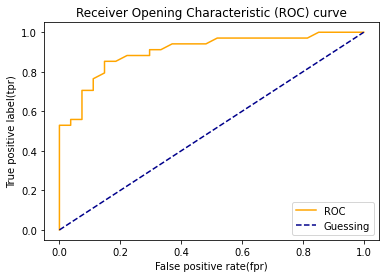

In [44]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """plots and ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model """
    #Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # plot line with no predictive power (baseline) 
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    #customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive label(tpr)")
    plt.title("Receiver Opening Characteristic (ROC) curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)



0.9046840958605664

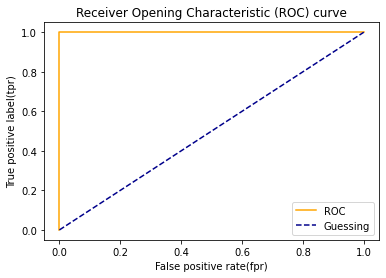

In [46]:
#create perfect ROC curve and AUC score
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [47]:
# perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predict and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused 

In [49]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[23,  4],
       [ 7, 27]], dtype=int64)

In [51]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,4
1,7,27


In [57]:

# install package in jupyter notebook

# seaborn is the package
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn

In [54]:
cd env


F:\DATA SCIENCE\FILE\miniconda_p1\env


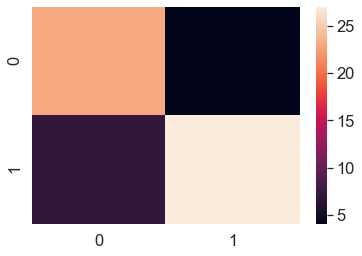

In [58]:
# make our confusion matricx more visual with seaborn's heatmap()

import seaborn as sns

# Set the font Scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

# plot using Seaborn
sns.heatmap(conf_mat);

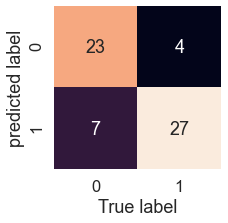

In [62]:
def plot_conf_mat(conf_mat):
    """plots a confusion matrix using Seaborn's heatmap()."""
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,annot=True,# Annotate the boxes with conf_mat info
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    #bottom,top=ax.get_ylim()
    #ax.set_ylim(bottom + 0.5,top-0.5);
plot_conf_mat(conf_mat)

**Classification Report**

a classification report is also a collection of different evaluation matrix 

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [68]:
# where precision and recall become valuable
disease_true=np.zeros(10000)
disease_true[0]=1 # ONLY ONE POSITIVE CASE

disease_preds=np.zeros(10000) # model predict every case as 0
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

F:\DATA SCIENCE\FILE\miniconda_p1\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\DATA SCIENCE\FILE\miniconda_p1\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\DATA SCIENCE\FILE\miniconda_p1\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

model evaluation metrics documentation https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2(R-squared) or coefficient of determination

2. Mean absolute error(MAE)

3. Mean squared error(MSE)

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### R^2(R-squared) or coefficient of determination

What R- squared does:Compares your models predictions to the mean of the targets. Values can range from negative infinity(a very poor model)to For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predict a range of number it's R^2 value would be number.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8654448653350507

In [18]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())
# y_test_mean
r2_score(y_test,y_test_mean)

0.0

In [19]:
r2_score(y_test,y_test)

1.0

### Mean absolute error(MAE)

MAE is the average of the aboslute between prediction and actual values.it gives you an idea of how wrong yours model predctions are. 

In [22]:
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae


2.136382352941176

In [25]:
df=pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})
df["difference"]=df["predicted values"]-df["actual values"]

In [26]:
df

,actual values,predicted values,difference
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


### Mean squared error(MSE)

In [28]:
from sklearn.metrics import mean_squared_error

y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
msei

9.867437068627442

In [30]:
# calculate mse bu hand 
squared=np.square(df["difference"])
squared.mean()

9.867437068627442

###  4.2.3 `scoring`  parameter

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease=pd.read_csv("data/heart-disease.csv")

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(X_train,Y_train);

In [38]:
clf.score(X_test,Y_test)

0.8524590163934426

In [39]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y)
#cv_acc=cross_val_score(clf,X,y,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [40]:
cv_acc.mean()

0.8248087431693989

In [43]:
# cross-valitated accuracy
print(f"The coross_valitated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The coross_valitated accuracy is: 82.48%


In [45]:
# accuracy
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,scoring="accuracy")
print(f"The coross_valitated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The coross_valitated accuracy is: 82.48%


In [46]:
#Precision
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,scoring="precision")
print(f"The coross_valitated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The coross_valitated accuracy is: 83.30%


In [47]:
#Recall
np.random.seed(42)
cv_recall=cross_val_score(clf,X,y,scoring="recall")
np.mean(cv_recall)

0.8545454545454545

In [49]:
np.random.seed(42)
cv_f1=cross_val_score(clf,X,y,scoring="f1")
np.mean(cv_f1)

0.8426854603423346

###### How about our regression model ?

In [50]:

X=boston_df.drop("target",axis=1)
y=boston_df["target"] 
model=RandomForestRegressor()


In [51]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [52]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [53]:
#mean absolute error
np.random.seed(42)
cv_mae=cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [55]:
#mean squared error
np.random.seed(42)
cv_mse=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

In [56]:
cv_mse.mean()

-21.261442856882137

### 4.3 Using different evaluation metrics as scikit-learn functions

In [35]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

heart_disease=pd.read_csv("data/heart-disease.csv")

In [36]:
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train);

y_preds=clf.predict(X_test)


# evaluate the classifier
print("Classifier metrics on the test set:")
print(f"     score: {precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall score: {recall_score(y_test,y_preds)*100:.2f}%")
print(f"f1: {f1_score(y_test,y_preds)*100:.2f}%")


Classifier metrics on the test set:
Accuracy:80.33%
Precision score: 78.57%
Recall score: 78.57%
f1: 78.57%


In [37]:
# Regression evaluation functions
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.datasets import load_boston

boston=load_boston()
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)

In [39]:
print("Regression model metrics on the test set:")
print(f"R^2_score:{r2_score(y_test,y_preds)*100:.2f}%")
print(f"MAE : {mean_absolute_error(y_test,y_preds):.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_preds):.2f}%")

Regression model metrics on the test set:
R^2_score:88.25%
MAE : 2.35%
MSE : 11.41%


# 5. Improving a model

First Prediction = baseline prediction.
First model = baseline model.

From a data perspective:
* could we collect more data? (generally,the more data, the better)
* could we improve our data 

From model prespective:
* Is there a better model we could use?
* could we improve the current model ?

Hyperparameters vs. parameters
* Parameters= model find the pattern in data 
* Hyperparameter = sittings on a model you can adjust to (potentially) improve it's ability to find it's patterns

Three ways to find Hyperparameters:
1. By hand 
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [40]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand 

Let's make 3 sets,training,validation and test

  We're going to try and adjust:
 
 * `max_depth`
 * `max_features`
 * `min_samples_leaf`
 * `min_sample_split`
 * `n_estimators`

In [9]:
#course materials(training set)
# Practice exam(Validation set)
# Final exam (test set)


import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [10]:
def evaluate_preds(y_true,y_preds):
    """ performs evaluation comparison on y_true labels vs. y_pred labels on a classification"""
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={
        "accuracy":round(accuracy,2),
        "precision":round(precision,2),
        "recall":round(recall,2),
        "f1":round(f1,2)
    }
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"precision: {precision:.2f}%")
    print(f"recall: {recall:.2f}%")
    print(f"f1: {f1:.2f}%")
    
    return metric_dict


In [3]:
heart_disease=pd.read_csv("data/heart-disease.csv")


In [12]:
np.random.seed(42)

# shuffle the data 
heart_disease_shuffled=heart_disease.sample(frac=1)

# split into X & y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#Split the data into train, validation and test sets
train_split=round(0.7*len(heart_disease_shuffled)) 
valid_split=round(train_split+0.15*len(heart_disease_shuffled))

X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

clf=RandomForestClassifier()
clf.fit(X_train,y_train)
# make baseline predictions
y_preds=clf.predict(X_valid)

# evaluate the classifier on the validation set
baseline_metrics= evaluate_preds(y_valid,y_preds)

Acc: 82.22%
precision: 0.81%
recall: 0.88%
f1: 0.85%


In [13]:
np.random.seed(42)

# create a second classifier with differrent hyperparameters
clf2=RandomForestClassifier(n_estimators=10)
clf2.fit(X_train,y_train)

# make baseline predictions
y_preds2=clf2.predict(X_valid)

# evaluate the 2nd classifier
clf_2_metrics= evaluate_preds(y_valid,y_preds2)

Acc: 82.22%
precision: 0.84%
recall: 0.84%
f1: 0.84%


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators": [10,100,200,500,1000,1200],
     "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]}

np.random.seed(42)
heart_disease_shuffled=heart_disease.sample(frac=1)


In [16]:
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)

# Setpu RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,cv=5,verbose=2)

rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; tot

In [17]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

In [18]:
# make prediction with best hyper parameters
rs_y_preds=rs_clf.predict(X_test)

rs_metrics=evaluate_preds(y_test,rs_y_preds)

Acc: 83.61%
precision: 0.87%
recall: 0.82%
f1: 0.84%


In [19]:
from sklearn.model_selection import GridSearchCV
grid_2={"n_estimators": [100,200,500],
     "max_depth":[None],
      "max_features":["auto","sqrt"],
      "min_samples_split":[6],
      "min_samples_leaf":[1,2]}

np.random.seed(42)

X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)

# Setpu griddSearchCV (it's act like a brotforce algorithm)
gs_clf=GridSearchCV(estimator=clf,param_grid=grid_2,cv=5,verbose=2)

gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [20]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [21]:
gs_y_preds=gs_clf.predict(X_test)

In [22]:
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Acc: 78.69%
precision: 0.74%
recall: 0.82%
f1: 0.78%


let's compare our different models metrics.

In [23]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics},
                              "clf_2": clf_2_metrics,
                              "random search": rs_metrics,
                               "grid search": gs_metrics)
compare_metrics.plot.bar(figsize=(10,8));

SyntaxError: invalid syntax (<ipython-input-23-d0cb245b49c9>, line 2)

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With python's `pickle` module 
2. with the `joblib` module

**Pickle**

In [25]:
import pickle

# save an extisting model to file 
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

In [26]:
# load a saved model

loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [27]:
# make some predictions
pickle_y_preds =  loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)


Acc: 78.69%
precision: 0.74%
recall: 0.82%
f1: 0.78%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}


**joblib**

In [28]:
from joblib import dump,load

dump(gs_clf,filename="gs_random_forest_model_J.joblib")

['gs_random_forest_model_J.joblib']

In [29]:
loaded_joblib_model = load(filename="gs_random_forest_model_J.joblib")

In [30]:
joblib_y_preds=loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc: 78.69%
precision: 0.74%
recall: 0.82%
f1: 0.78%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

 ## 7.  puttting it all together 

In [2]:
import numpy as np 
import pandas as pd


In [3]:
data =pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [4]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [5]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

steps we want to do(all in one cell):

    1. Fill missing data 
    2. Conver to the numbers
    3. Build a model on the data 

In [6]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

#setup random seed
import numpy as np
np.random.seed(42)

# import datas and drop the rows with missintg labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")

data.dropna(subset=["Price"],inplace=True)

# define different features and transformer pipline 

categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                        ("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_feature=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numeric_features=["Odometer (KM)"]
numeric_transform=Pipeline(steps=[
("imputer",SimpleImputer(strategy="mean"))    
])


# Setup preprocessing steps (fill missing values,them convert to numbers)
preprocessor=ColumnTransformer(transformers=[
    ("cat",categorical_transformer,categorical_features),
    ("door",door_transformer,door_feature),
    ("num",numeric_transform,numeric_features)
])

# creating a preprocessing and modelling pipeline

model=Pipeline(steps=[("preprocessor",preprocessor),("model",RandomForestRegressor())])

#split data
X=data.drop("Price", axis=1)
y=data["Price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Fit and score model
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

#### addition

 dataset["target"]=dataset["target"].apply(lambda x:data.target_names[x])
 
 data.target_names         
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10')